In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep


from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib
from community import community_louvain
import seaborn as sns
from termcolor import colored
from networkx.algorithms.community import label_propagation_communities
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


In [3]:
import pandas as pd
from pandas.core.frame import DataFrame
df = pd.read_csv('khungbo/terrorism-in-turkey.csv', usecols=['city', 'Target_type'])

df

,city,Target_type
0,Trabzon,Unknown
1,Istanbul,Police
2,Istanbul,Tourists
3,Ankara,NGO
4,Kucukmece,Business
...,...,...
542,Unknown,Military
543,Istanbul,Journalists & Media
544,Dogubeyazit district,Transportation
545,Semdinli district,Military


In [6]:
#Tìm missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")
#--------------------------------------
df.dropna()
df.drop_duplicates()
df

#df= df.replace('Unknown', np.nan)
#df.dropna(inplace=True)
#df.drop_duplicates()
#df.reset_index(drop=True,inplace=True)
#df.head(18)


No missing value found


,city,Target_type
0,Trabzon,Unknown
1,Istanbul,Police
2,Istanbul,Tourists
3,Ankara,NGO
4,Kucukmece,Business
...,...,...
542,Unknown,Military
543,Istanbul,Journalists & Media
544,Dogubeyazit district,Transportation
545,Semdinli district,Military


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         547 non-null    object
 1   Target_type  547 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB


In [8]:
df.describe()

,city,Target_type
count,547,547
unique,165,19
top,Istanbul,Government (General)
freq,175,99


In [22]:
import networkx as nx
from networkx.algorithms import bipartite

B = nx.Graph()
City = df['city']
Target = df['Target_type']

#Name = df['UA_Country']
#Rating = df['Cost of Living']



print('Số thành phố:', City.nunique())
print('Số mục tiêu tấn công:', Target.nunique())
print('Số cạnh:', len(df))

Số thành phố: 165
Số mục tiêu tấn công: 19
Số cạnh: 547


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         547 non-null    object
 1   Target_type  547 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB


## Tạo node

In [24]:
for index, row in df.iterrows():
  B.add_edge(row['city'], row['Target_type'], weight = 1)
B.add_nodes_from(City, bipartite = 0)
B.add_nodes_from(Target, bipartite = 1)

## Code hiển thị đồ thị 2 phía

<Figure size 864x864 with 0 Axes>

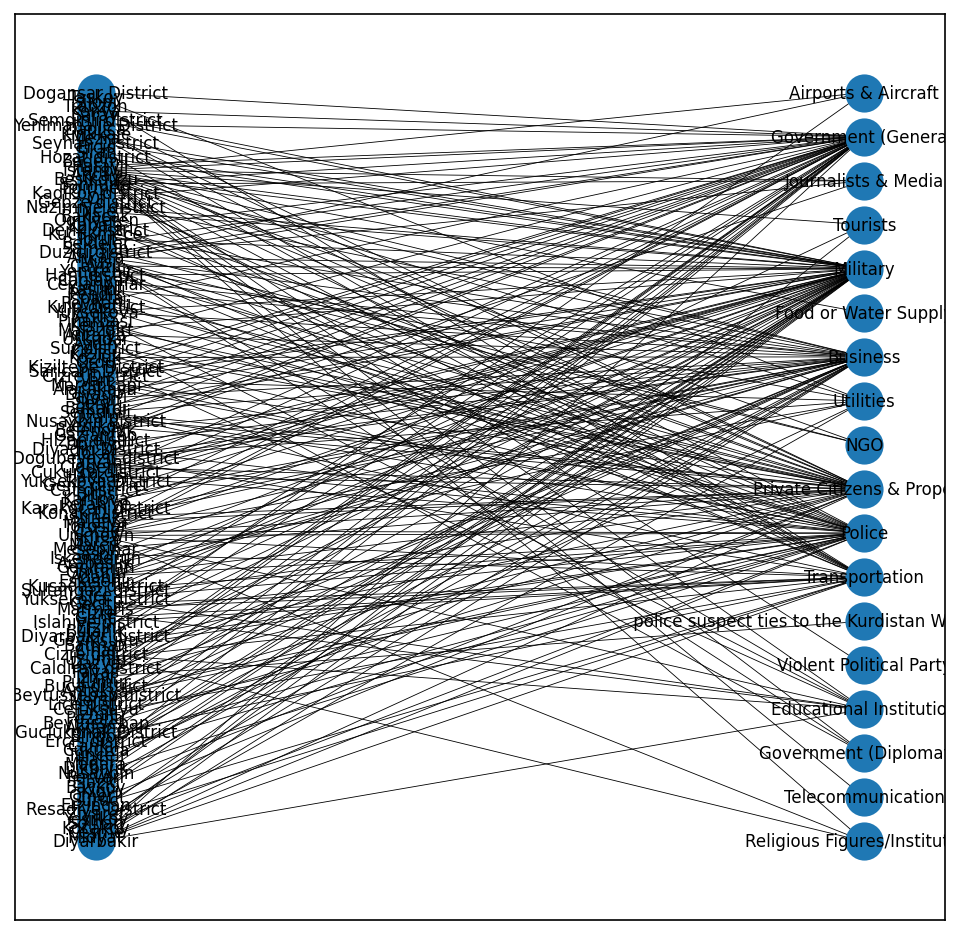

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, City), font_size=8, width=0.4)

## Code hiển thị đồ thị 1 phía:

In [27]:
G = bipartite.weighted_projected_graph(B, City)
plt.figure(figsize=(12,12))
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G, layout, nodelist=City, node_size=150, node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(City, City))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')
plt.title("Graph City")

plt.show()

NetworkXAlgorithmError: the size of the nodes to project onto (547) is >= the graph size (183).
They are either not a valid bipartite partition or contain duplicates

## Xuất dữ liệu để thao tác trên Gephi:

In [21]:
labels = nx.get_edge_attributes(G, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
  df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index=True)
df2.to_csv(r'myTerrorismdataNodes.csv', index = False, header = True)


NameError: name 'G' is not defined

In [73]:
dfn = pd.read_csv('myTerrorismdataNodes.csv', usecols=['source', 'target','weight'])
dfn.dropna()
dfn.drop_duplicates()
dfn

,source,target,weight
0,Trabzon,Transportation,1
1,Trabzon,Hatay,1
2,Trabzon,Marcik,1
3,Trabzon,Ankara,1
4,Trabzon,Utilities,1
...,...,...,...
3795,Ercis district,Pozanti,1
3796,Cinar,Pozanti,1
3797,Akcay,Hani,1
3798,Sur district,Ozalp,1


In [ ]:
G = nx.Graph()

edges = dfn[['source', 'target']]
G = nx.from_pandas_edgelist(edges, 'source', 'target')

print('Số đỉnh của đồ thị là', len(G.nodes()))
print('Số cạnh của đồ thị là', len(G.edges()))

Số đỉnh của đồ thị là 178
Số cạnh của đồ thị là 3800


In [ ]:
print('Kiểm tra đồ thị liên thông: ')
nx.is_connected(G)

Kiểm tra đồ thị liên thông: 


True

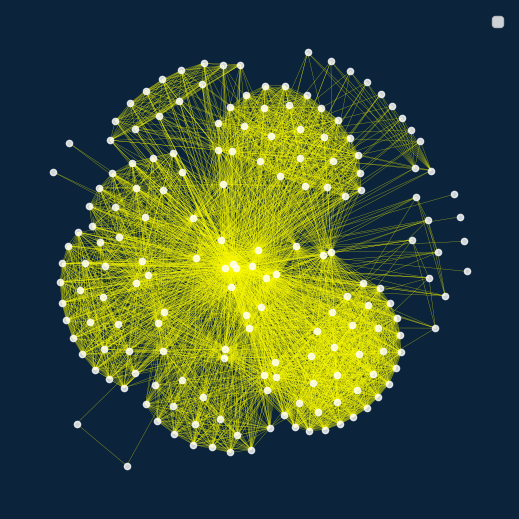

In [ ]:
# %load_ext autotime
# nx.draw_networkx(G)

pd.set_option('precision',10)

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.kamada_kawai_layout(G)

cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (5,5), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 20, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()

# New Sectiona

In [ ]:
nx.average_shortest_path_length(G)

1.7611883450771282

In [ ]:
# average degree

average_degree = sum([len(list(G.neighbors(n))) for n in G.nodes()]) / len(G.nodes())

print('Average degree: ', average_degree)

Average degree:  42.69662921348315


In [ ]:
#degree of each node
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df

degree_dict = { node: 0 for node in G.nodes() }

for node in G.nodes():
  degree_dict[node] = len(list(G.neighbors(node)))

degree_df = print_table(degree_dict.items(), ['Node', 'Degree'])

degree_df

,Node,Degree
0,Trabzon,14
1,Transportation,6
2,Hatay,50
3,Marcik,14
4,Ankara,154
...,...,...
173,Geyiksuyu,52
174,Journalists & Media,1
175,Airports & Aircraft,1
176,NGO,1


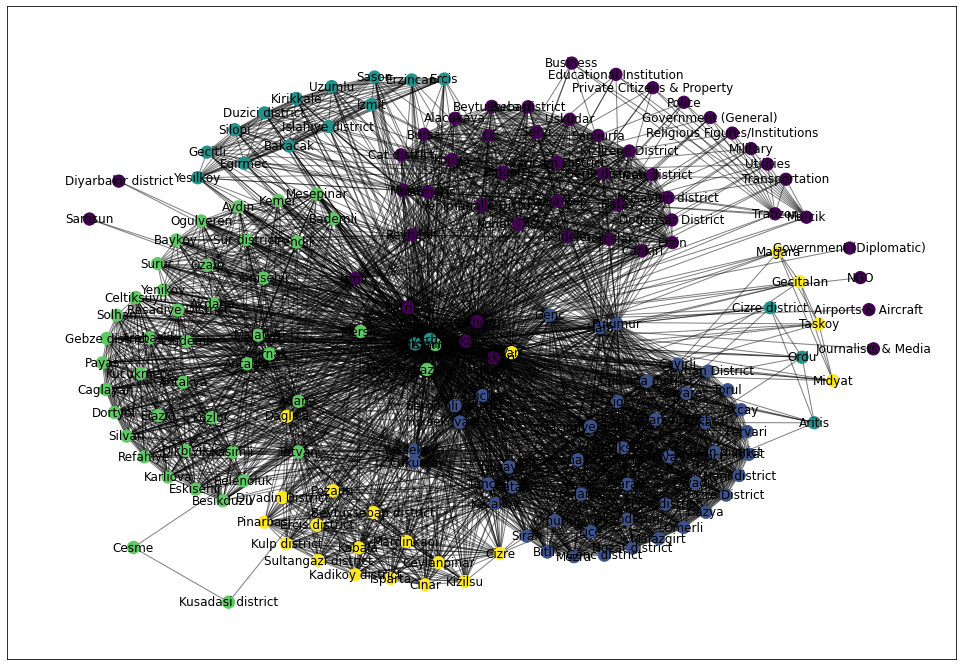

In [ ]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib

plt.figure(figsize=(17, 12))
#compute the best partition
partition = community_louvain.best_partition(G)
#color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=150, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

In [ ]:
import numpy as np
values = list(partition.values())

print('Số lượng cộng đồng: ', len(np.unique(values)))

Số lượng cộng đồng:  5


In [ ]:
for i in range(len(np.unique(values))):
  print('Nhóm ', i, ":")
  for name, k in partition.items():
    if k == i:
      print(name)
  print("")

Nhóm  0 :
Trabzon
Transportation
Hatay
Marcik
Ankara
Utilities
Military
Religious Figures/Institutions
Government (General)
Bingol
Private Citizens & Property
Unknown
Police
Educational Institution
Business
Diyarbakir district
Samsun
Erzin
Mus
Nusaybin district
Hizan district
Konak District
Derik district
Kiziltepe District
Sanliurfa
Izmir
Marmaris
Toroslar
Saricam District
Buca district
Uskudar
Beytussebap
Gaziantep
Of
Alacakaya
Reyhanli
Bursa
Konya
Yenimahalle District
Hakkari
Cat district
Servi
Beldeler
Batman
Cankiri
Dogansar District
Journalists & Media
Airports & Aircraft
NGO
Government (Diplomatic)

Nhóm  1 :
Pervari
Semdinli district
Akcay
Ziyaret
Torul
Karakocan district
Cukurca district
Genc
Hani
Seyhan District
Bukardi
Nazimiye district
Saray
Catak
Omurlu
Siran
Bulanik
Lice
Bitlis
Genc district
Malazgirt
Mezra
Hozat district
Guclukonak District
Iskenderun
Omerli
Cukurca
Yuksekova district
Kigi
Yuksekova District
Lice district
Cayirli
Dicle
Pulumur
Dazya
Yuksekova
Cizre Distr

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
k = preprocessing.LabelEncoder()
dfkmean = df.copy()
dfkmean

,city,Target_type
0,Trabzon,Unknown
1,Istanbul,Police
2,Istanbul,Tourists
3,Ankara,NGO
4,Kucukmece,Business
...,...,...
542,Unknown,Military
543,Istanbul,Journalists & Media
544,Dogubeyazit district,Transportation
545,Semdinli district,Military


In [ ]:
k.fit(dfkmean['city'])
dfkmean['cityNum'] = k.transform(dfkmean['city'])
dfkmean['cityNum'].drop_duplicates()

0      151
1       78
3        4
4       95
5      160
      ... 
498    124
501    144
506     70
528    119
530     43
Name: cityNum, Length: 165, dtype: int64

In [ ]:
k.fit(dfkmean['Target_type'])
dfkmean['TargetNum'] = k.transform(dfkmean['Target_type'])
dfkmean['TargetNum'].drop_duplicates()

0      16
1      10
2      14
3       9
4       2
5      15
6      18
7      11
11      1
13      6
17      8
51     17
99      4
107     3
112     7
131    13
185     5
193    12
262     0
Name: TargetNum, dtype: int64

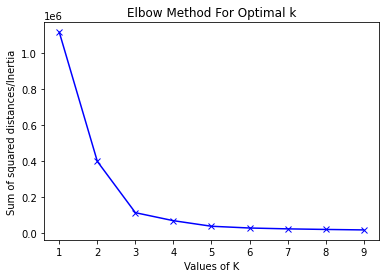

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
  kmeans = KMeans(n_clusters = num_clusters)
  kmeans.fit(dfkmean[['cityNum', 'TargetNum']])
  sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel( 'Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

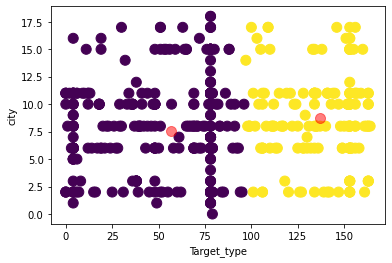

Toạ độ trung tâm cụm:  [[ 56.46803069   7.57033248]
 [136.73717949   8.73076923]]


In [ ]:
algorithm = KMeans(n_clusters = 2, init='random' )
algorithm.fit(dfkmean[['cityNum','TargetNum']])
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_ #Gán toạ độ trung tâm cụm
plt.clf()
plt.scatter( x = 'cityNum' ,y = 'TargetNum' , data = dfkmean[['cityNum','TargetNum']], c = labels2, s = 100 )
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 100, c = 'red', alpha = 0.5)
plt.ylabel('city'), plt.xlabel('Target_type')
plt.show()
print('Toạ độ trung tâm cụm: ', centroids2)

In [ ]:
note = dfkmean.drop_duplicates(subset='Target_type', keep="last")
print('Số mục tiêu tấn công: ',len(note[['Target_type','TargetNum']]))
print(note[['Target_type','TargetNum']].to_string())


Số mục tiêu tấn công:  19
                                                    Target_type  TargetNum
47                                      Violent Political Party         18
99                                         Food or Water Supply          4
131                                           Telecommunication         13
208                                                     Unknown         16
236                                                    Tourists         14
262   police suspect ties to the Kurdistan Workers Party (PKK).          0
294                                                         NGO          9
455                              Religious Figures/Institutions         12
474                                                   Utilities         17
479                                     Educational Institution          3
511                                         Airports & Aircraft          1
529                                 Private Citizens & Property         11

In [ ]:
noteGenre = dfkmean.drop_duplicates(subset='city', keep="last")
print('Số thành phố: ',len(noteGenre[['city','cityNum']]))
print(noteGenre[['city','cityNum']].to_string())

Số thành phố:  165
                     city  cityNum
0                 Trabzon      151
4               Kucukmece       95
5                Yesilkoy      160
7                  Akdana        2
10                 Baykoy       13
12      Resadiye District      127
14               Dikbiyik       45
15                Kizilsu       89
22                  Bursa       24
23        Seyhan District      137
31                Cankiri       27
58                     Of      114
59                 Marcik      103
62   Yenimahalle District      158
65     Yuksekova District      162
66           Cat district       28
69       Diyadin District       47
70                  Konya       93
71     Kiziltepe District       90
72                 Elazig       55
73         Cizre District       37
78                 Uzumlu      155
79                Cayirli       30
81                  Payas      120
82      Dogansar District       50
87               Caglayan       25
88              Arabaslik        7
8

In [ ]:
clusterX = dfkmean.loc[dfkmean['TargetNum'].isin([7, 8, 9])]
clusterY = dfkmean.loc[dfkmean['cityNum'].isin([37, 38])]
pd.merge(clusterX, clusterY, how='inner', on=['TargetNum', 'cityNum'])
# dfkmean

,city_x,Target_type_x,cityNum,TargetNum,city_y,Target_type_y
0,Cizre District,Military,37,8,Cizre District,Military


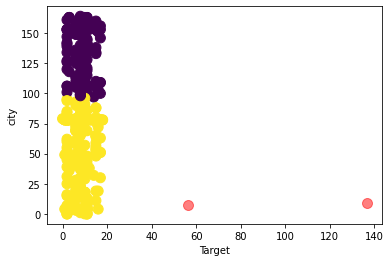

Toạ độ trung tâm cụm:  [[136.73717949   8.73076923]
 [ 56.46803069   7.57033248]]


In [ ]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters = 2, init='random' )
algorithm.fit(dfkmean[['cityNum','TargetNum']])
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_ #Gán toạ độ trung tâm cụm
plt.clf()
plt.scatter( x = 'TargetNum' ,y = 'cityNum' , data = dfkmean[['TargetNum','cityNum']], c = labels2, s = 100 )
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 100, c = 'red', alpha = 0.5)
plt.ylabel('city'), plt.xlabel('Target')
plt.show()
print('Toạ độ trung tâm cụm: ', centroids2)

ModuleNotFoundError: ignored